# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import histogram
from matplotlib.pyplot import bar
from skimage.color import rgb2gray, rgb2hsv

# Convolution:
from scipy.signal import convolve2d
from scipy import fftpack
import math

from skimage.util import random_noise
from skimage.filters import median,gaussian
from skimage.feature import canny


# Edges
from skimage.filters import sobel_h, sobel, sobel_v, roberts, prewitt
from skimage.filters import roberts, sobel, prewitt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:

# Show the figures / plots inside the notebook
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ["(%d)" % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


def showHist(img):
    # An "interface" to matplotlib.axes.Axes.hist() method
    plt.figure()
    imgHist = histogram(img, nbins=256)

    bar(imgHist[1].astype(np.uint8), imgHist[0], width=0.8, align="center")


In [3]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

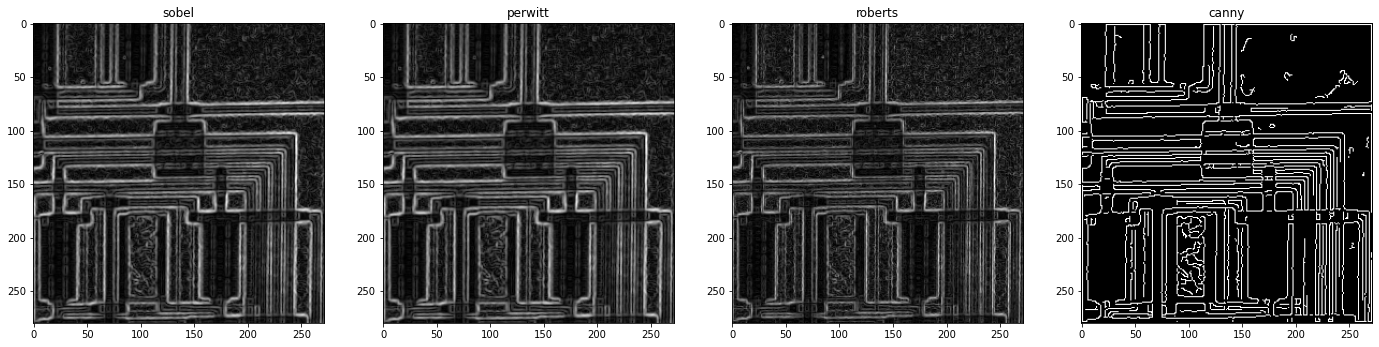

In [4]:
# 1. Built-in Sobel, Prewill, Roberts

img = io.imread('./imgs/circuit.tif')
show_images([sobel(img),prewitt(img),roberts(img),canny(img)],['sobel','perwitt','roberts','canny'])


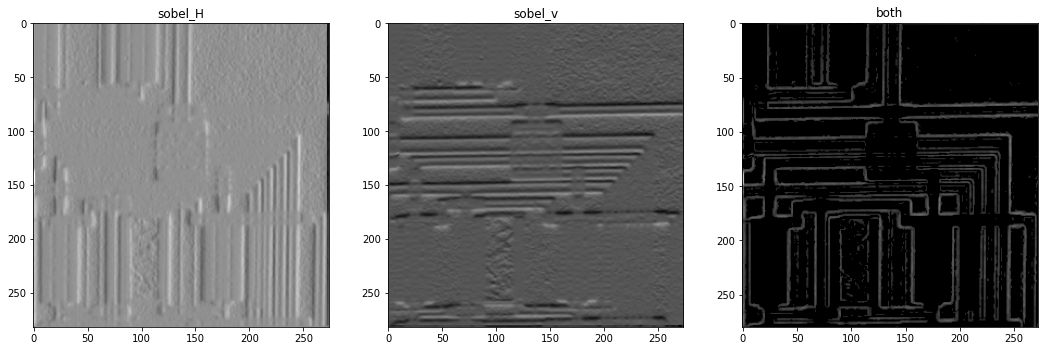

In [5]:
# 2. Custom Sobel (V-H-Both)
sobelH = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobelV = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
imgh = convolve2d(img, sobelH)
imgv = convolve2d(img, sobelV)
img_both = np.zeros(img.shape ,dtype="int")
for x in range(0,img.shape[0]):
    for y in range(0,img.shape[1]):
        # print(img_both[x][y])
        # print(imgv[x][y])
        # print(imgh[x][y])
        img_both[x][y] = int(math.sqrt(imgh[x][y].astype(int) ** 2 + imgv[x][y].astype(int) ** 2))
T = 100
img_both = np.where(img_both>T,img_both,0)
show_images([imgh, imgv, img_both], ["sobel_H", "sobel_v", "both"])


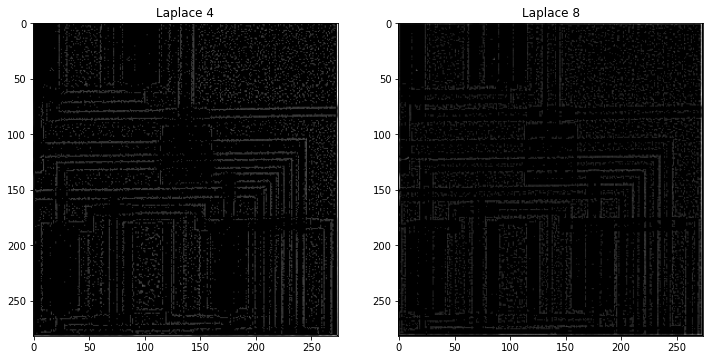

In [6]:
# 3. Custom LoG
img_filter = gaussian(img,sigma=10)
laplace1 = np.array([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
laplace2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
img1 = convolve2d(img, laplace1)
img2 = convolve2d(img, laplace2)
img1 = np.where(img1>30,img1+50,0)
img2 = np.where(img2>12,img2+20,0)
show_images([img2, img1], ["Laplace 4", "Laplace 8"])


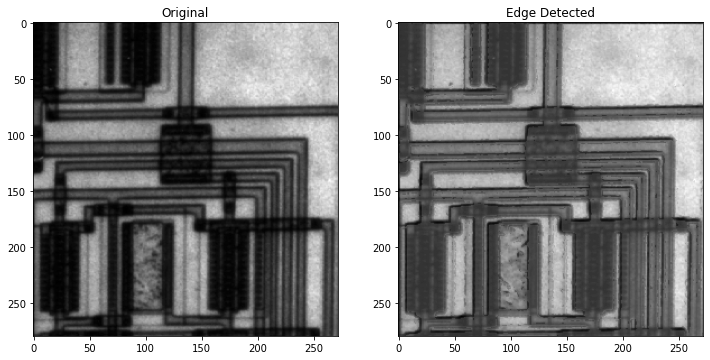

In [7]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''
edge_detected = img_both
edge_detected = edge_detected*0.2
edge_detected = img - edge_detected
show_images([img, edge_detected], ["Original", "Edge Detected"])